In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_csv("Heart Disease.csv")
dfgr = df.copy()
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## DataFrame info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Categorical Columns

In [4]:
categorical_columns = df.select_dtypes(include='object').columns

In [5]:
categorical_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Unique Values

In [6]:
for col in df.columns:
    print(f"{col}: {list(df[col].unique())}")

HeartDisease: ['No', 'Yes']
BMI: [16.6, 20.34, 26.58, 24.21, 23.71, 28.87, 21.63, 31.64, 26.45, 40.69, 34.3, 28.71, 28.37, 28.15, 29.29, 29.18, 26.26, 22.59, 29.86, 18.13, 21.16, 28.9, 26.17, 25.82, 25.75, 34.34, 31.66, 24.89, 36.58, 25.84, 30.67, 45.35, 19.02, 38.97, 32.98, 24.62, 20.43, 27.37, 21.93, 22.6, 28.13, 25.06, 30.23, 30.34, 20.37, 33.23, 25.11, 20.12, 27.46, 26.61, 31.09, 27.12, 32.61, 32.1, 24.02, 32.55, 46.52, 29.55, 27.2, 28.94, 21.03, 22.31, 31.46, 26.63, 34.01, 22.04, 23.87, 40.0, 21.97, 27.76, 33.75, 25.54, 27.63, 34.33, 28.29, 30.56, 21.14, 29.53, 24.37, 28.25, 23.78, 34.75, 22.67, 32.81, 27.05, 44.29, 36.02, 21.8, 22.05, 23.96, 19.49, 28.35, 19.47, 24.8, 24.68, 23.49, 27.98, 25.09, 58.54, 24.13, 45.42, 29.99, 26.25, 34.46, 34.41, 38.74, 26.22, 25.1, 20.94, 28.89, 39.71, 23.67, 17.47, 39.53, 33.65, 28.97, 28.73, 37.59, 25.83, 36.49, 23.39, 45.33, 27.44, 33.2, 23.73, 31.48, 27.73, 23.3, 32.14, 23.34, 31.19, 23.24, 32.92, 31.75, 19.74, 39.99, 34.67, 22.14, 22.24, 17.71

In [7]:
df['Diabetic'].replace({'No, borderline diabetes':'No', 'Yes (during pregnancy)':'Yes'}, inplace=True)
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

# Encoding

In [8]:
encoder = OrdinalEncoder(dtype=int)

#### Yes/NO columns

In [9]:
yesno_cols = [col for col in categorical_columns if df[col].nunique() is 2]
print(yesno_cols)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [10]:
df[yesno_cols] = encoder.fit_transform(df[yesno_cols])

In [11]:
df[yesno_cols].head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,1,1,1,0,1
1,0,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0


#### AgeCategory column

In [12]:
ages = sorted(df['AgeCategory'].unique())
print(ages)

['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']


In [13]:
df[['AgeCategory']] = encoder.fit_transform(df[['AgeCategory']])

#### GenHealth column

In [14]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [15]:
genhealth_enc = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good','Very good', 'Excellent']], dtype=int)
df[['GenHealth']] = genhealth_enc.fit_transform(df[['GenHealth']])
df['GenHealth'].unique()

array([3, 1, 2, 0, 4])

#### Race column

In [16]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [17]:
df['Race'] = df['Race'].replace("American Indian/Alaskan Native", "American")
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American', 'Other', 'Hispanic'],
      dtype=object)

In [18]:
df = pd.concat([df.drop(columns=['Race'], axis=1), pd.get_dummies(df['Race'], prefix='race')], axis=1)

In [19]:
df.drop(columns=['race_Other'], axis=1, inplace=True)

In [20]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,race_American,race_Asian,race_Black,race_Hispanic,race_White
0,0,16.60,1,0,0,3,30,0,0,7,...,3,5,1,0,1,False,False,False,False,True
1,0,20.34,0,0,1,0,0,0,0,12,...,3,7,0,0,0,False,False,False,False,True
2,0,26.58,1,0,0,20,30,0,1,9,...,1,8,1,0,0,False,False,False,False,True
3,0,24.21,0,0,0,0,0,0,0,11,...,2,6,0,0,1,False,False,False,False,True
4,0,23.71,0,0,0,28,0,1,0,4,...,3,8,0,0,0,False,False,False,False,True


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  SleepTime         319795 non-null  int64  
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

# Correlation

In [22]:
from matplotlib.colors import LinearSegmentedColormap

<Axes: >

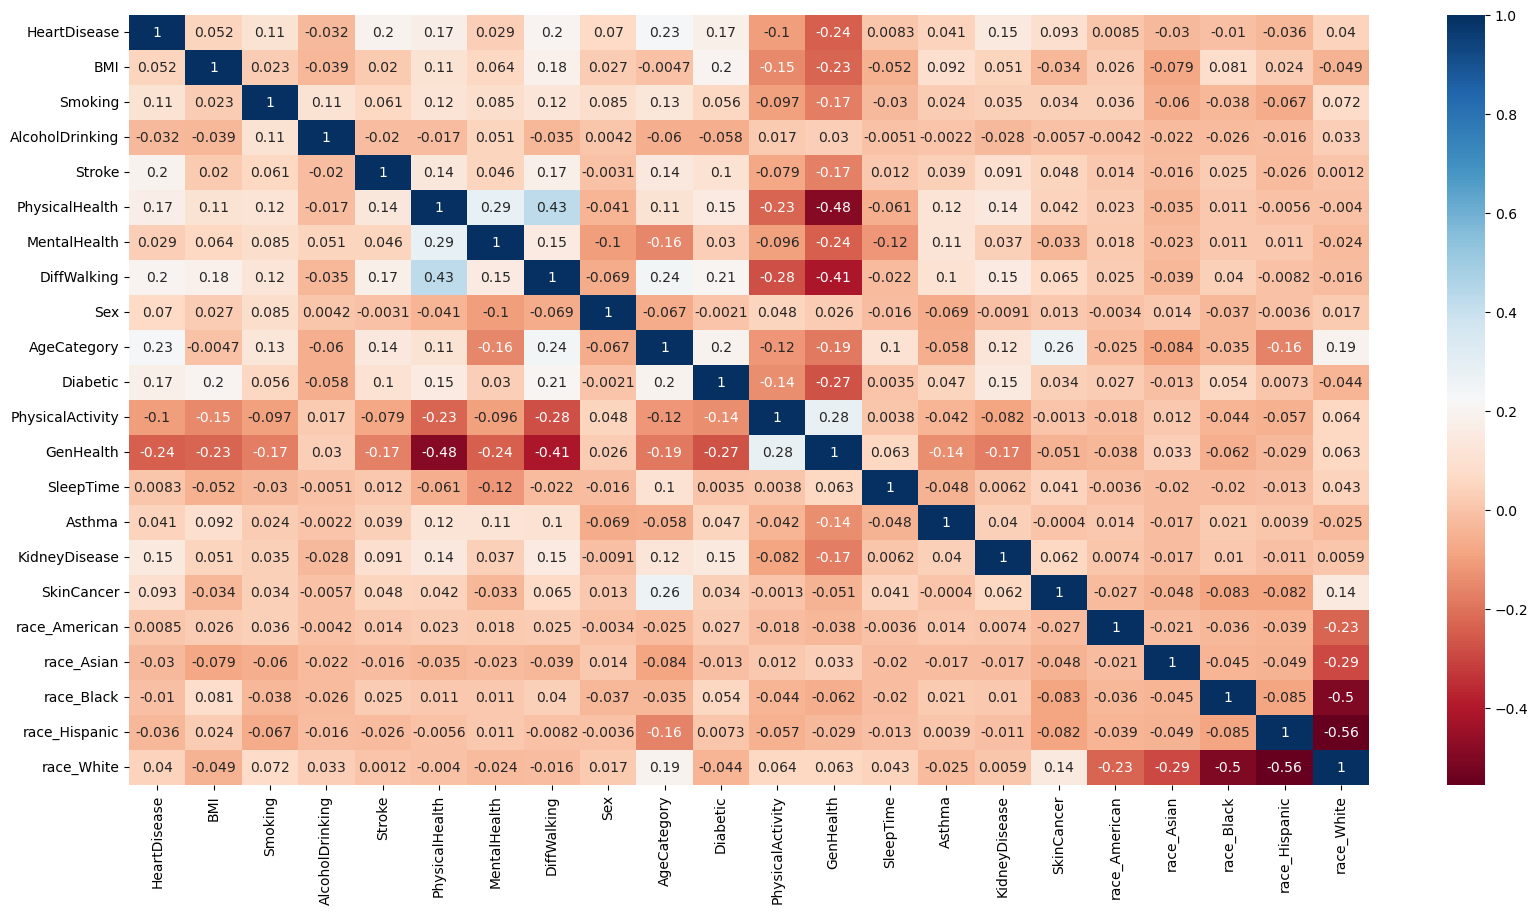

In [23]:
plt.figure(figsize=(20,10))
cmap = LinearSegmentedColormap.from_list('Custom', ['#fae8ff', '#f472b6'])
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

## Remove duplicates

In [24]:
df.shape

(319795, 22)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(301304, 22)

## Feature & Label

In [27]:
X = df.drop(columns=['HeartDisease'], axis=1)
y = df['HeartDisease']

## Checking imbalance

In [28]:
y.value_counts()

HeartDisease
0    274047
1     27257
Name: count, dtype: int64

# Over-sampling

In [29]:
over = RandomOverSampler()
x1,y1 = over.fit_resample(X,y)

In [30]:
y1.value_counts()

HeartDisease
0    274047
1    274047
Name: count, dtype: int64

# Training models

In [31]:
xtrain, xtest, ytrain, ytest = tts(x1, y1, test_size=0.3, random_state=42)

In [32]:
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
traing_scores = []
testing_scores = []

# Logistic Regression

In [33]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

LogisticRegression()

In [34]:
log_pred = log.predict(xtest)
log_test_score = log.score(xtest,ytest)
log_train_score = log.score(xtrain,ytrain)
print(f"Train accuracy: {log_train_score*100:.2f}")
print(f"Test accuracy: {log_test_score*100:.2f}")

Train accuracy: 75.93
Test accuracy: 76.00


In [35]:
traing_scores.append(log_train_score)
testing_scores.append(log_test_score)
print(classification_report(ytest, log_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     82217
           1       0.75      0.78      0.77     82212

    accuracy                           0.76    164429
   macro avg       0.76      0.76      0.76    164429
weighted avg       0.76      0.76      0.76    164429



# Decision Tree

In [36]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
dt_pred = dt.predict(xtest)
dt_train_score = dt.score(xtrain,ytrain)
dt_test_score = dt.score(xtest,ytest)
print(f"Train accuracy: {dt_train_score*100:.2f}")
print(f"Test accuracy: {dt_test_score*100:.2f}")

Train accuracy: 99.78
Test accuracy: 94.74


In [38]:
traing_scores.append(dt_train_score)
testing_scores.append(dt_test_score)
print(classification_report(ytest, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     82217
           1       0.90      1.00      0.95     82212

    accuracy                           0.95    164429
   macro avg       0.95      0.95      0.95    164429
weighted avg       0.95      0.95      0.95    164429



# K-nearest neighbors (KNN)

In [39]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [40]:
knn_pred = knn.predict(xtest)
knn_train_score = knn.score(xtrain,ytrain)
knn_test_score = knn.score(xtest,ytest)
print(f"Train accuracy: {knn_train_score*100:.2f}")
print(f"Test accuracy: {knn_test_score*100:.2f}")

Train accuracy: 91.51
Test accuracy: 88.14


In [41]:
traing_scores.append(knn_train_score)
testing_scores.append(knn_test_score)
print(classification_report(ytest, knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     82217
           1       0.81      0.99      0.89     82212

    accuracy                           0.88    164429
   macro avg       0.90      0.88      0.88    164429
weighted avg       0.90      0.88      0.88    164429



# Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [43]:
rf_pred = rf.predict(xtest)
rf_train_score = rf.score(xtrain,ytrain)
rf_test_score = rf.score(xtest,ytest)
print(f"Train accuracy: {rf_train_score*100:.2f}")
print(f"Test accuracy: {rf_test_score*100:.2f}")

Train accuracy: 99.78
Test accuracy: 96.22


In [44]:
traing_scores.append(rf_train_score)
testing_scores.append(rf_test_score)
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     82217
           1       0.93      1.00      0.96     82212

    accuracy                           0.96    164429
   macro avg       0.96      0.96      0.96    164429
weighted avg       0.96      0.96      0.96    164429



# Comparison

### Accuracy score

In [45]:
df_acc_score = pd.DataFrame({
   'Model': ['Logistic Regression','Logistic Regression','Decision Tree','Decision Tree','KNN','KNN','Random Forest','Random Forest'],
   'Score': ['Training score','Testing score', 'Training score','Testing score', 'Training score','Testing score',  'Training score','Testing score'],
   'Accuracy': [0.759478,0.758650,  0.997834,0.946567,  0.915059,0.880611,  0.997826,0.962117, ]
})
df_acc_score

,Model,Score,Accuracy
0,Logistic Regression,Training score,0.759478
1,Logistic Regression,Testing score,0.758650
2,Decision Tree,Training score,0.997834
3,Decision Tree,Testing score,0.946567
4,KNN,Training score,0.915059
5,KNN,Testing score,0.880611
6,Random Forest,Training score,0.997826
7,Random Forest,Testing score,0.962117


<Axes: xlabel='Model', ylabel='Accuracy'>

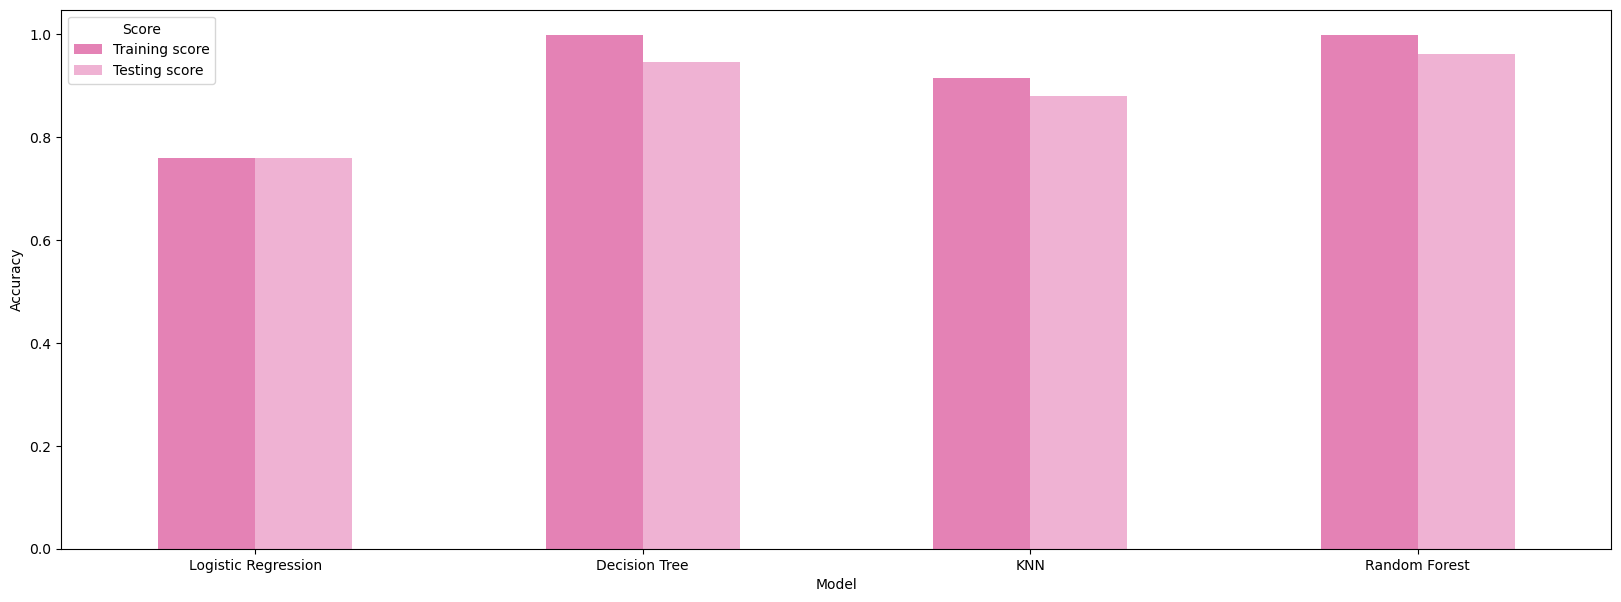

In [46]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_acc_score, x='Model', y='Accuracy', hue='Score', width=0.5,
            palette=['#f472b6', '#f9a8d4'])

### Confusion Matrix

Text(0.5, 80.7222222222222, 'Random Forest')

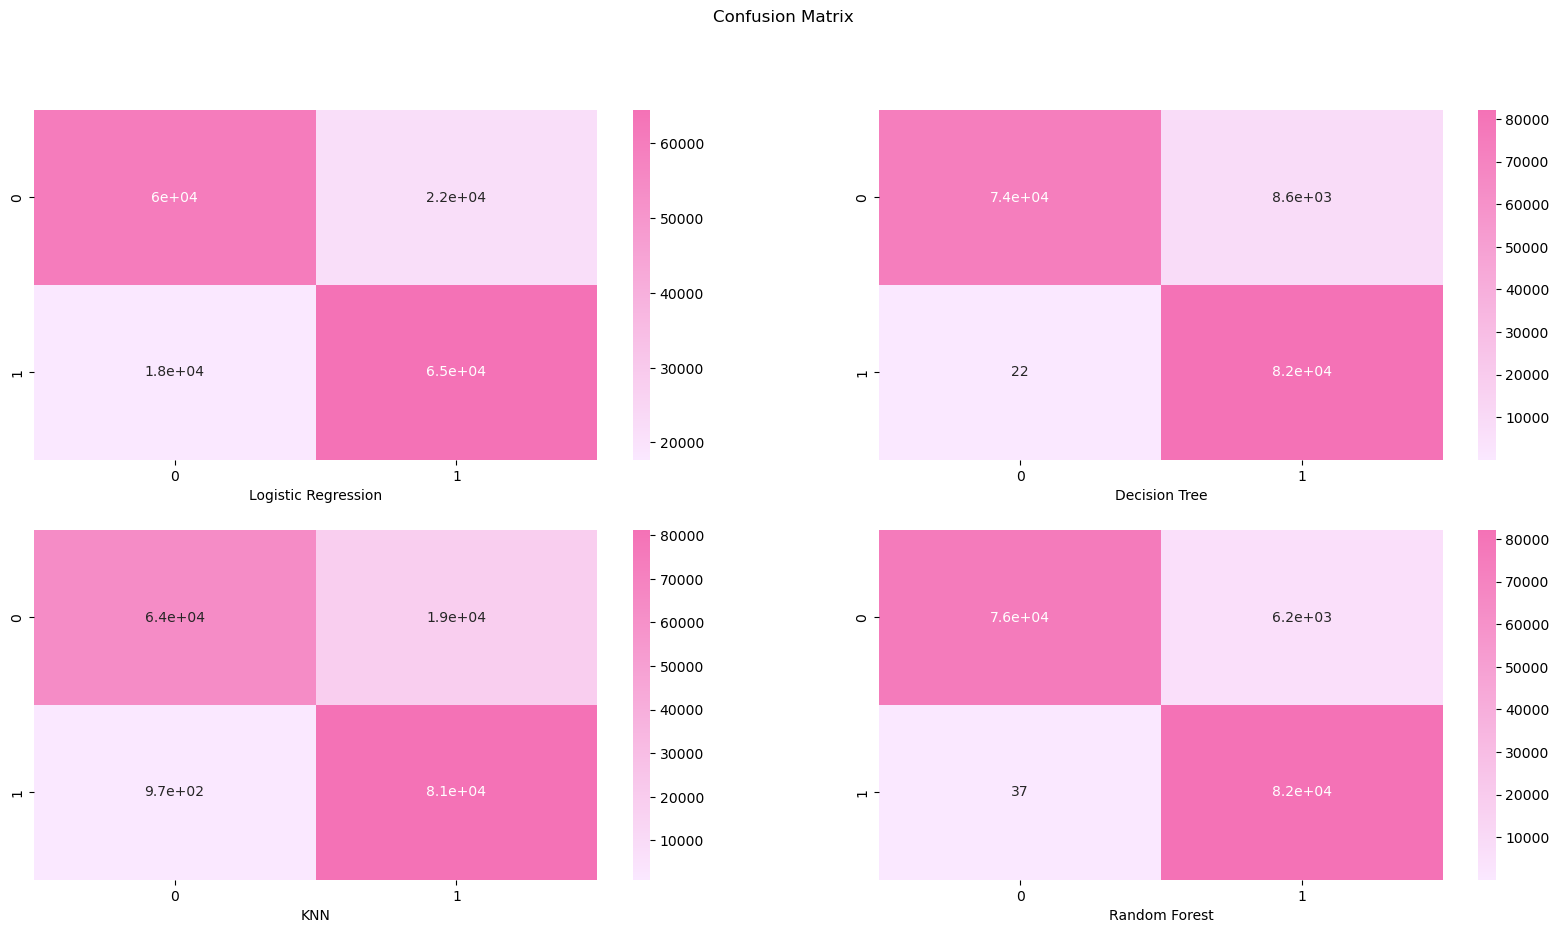

In [47]:
plt.figure(figsize=(20,10))
plt.suptitle("Confusion Matrix")

plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(ytest, log_pred), annot=True, cmap=cmap)
plt.xlabel('Logistic Regression')

plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(ytest, dt_pred), annot=True, cmap=cmap)
plt.xlabel('Decision Tree')


plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(ytest, knn_pred), annot=True, cmap=cmap)
plt.xlabel('KNN')

plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(ytest, rf_pred), annot=True, cmap=cmap)
plt.xlabel('Random Forest')

# Best Model

<pre>Random Forest  >  Decision Tree  >  KNN  >  Logistic Regression</pre>

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

# Cross validation

### K-Fold Cross Validation

In [48]:
kf_scores = cross_val_score(rf, x1, y1, cv=KFold())
print(f"Min score: {kf_scores.min()}")
print(f"Max score: {kf_scores.max()}")
print(f"Mean score: {kf_scores.mean()}")

Min score: 0.9199956211970552
Max score: 0.9998905289277309
Mean score: 0.9592826059178226


### Stratified K-Fold Cross Validation

In [49]:
skf_scores = cross_val_score(rf, x1, y1, cv=StratifiedKFold())
print(f"Min score: {skf_scores.min()}")
print(f"Max score: {skf_scores.max()}")
print(f"Mean score: {skf_scores.mean()}")

Min score: 0.9653435991935705
Max score: 0.9692751190497911
Mean score: 0.966969173729224
